# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 3

Do wykonania laboratorium należy skorzystać z bibliotek:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)

### Zadanie 1 - zakupy

W sklepie dostępne są następujące produkty:

| Produkt | Cena (netto) | Podatek |
| --- | --- | --- |
| Chleb | 3 | 5% |
| Butelka wody (1l) | 2 | 8% |
| Pomidor 1szt. | 2 | 5% |
| Olej (1l) | 6 | 5% |
| Szafran | 1.5 | 8% |
| Krewetki (opakowanie) | 20 | 23% |
| Lód (opakowanie) | 5 | 23% |


#### Zadanie 1 A

- Zapisz nazwy produktów w tablicy `N`.
- Zapisz ceny produktów w tablicy `C`.
- Zapisz podatek w tablicy `P`.

*(tablicy jedno wymiarowej czyli wektorze)*



In [4]:
import numpy as np
N = np.array(['Chleb','Butelka wody (1l)', 'Pomidory 1szt', 'Olej (1l)', 'Szafran', 'Krewetki (opakowanie)', 'Lód (opakowanie)'])
C = np.array([3,2,2,6,1.5,20,5])
P = np.array([0.05,0.08,0.05,0.05,0.08,0.23,0.23])

array([0.05, 0.08, 0.05, 0.05, 0.08, 0.23, 0.23])

#### Zadanie 1 B

Klient kupił:

- 2 szt. chleba, 
- 6 butelek wody,
- 1 opakowanie krewetek.

Zapisz zakupy klienta w wektorze `Z` (zachowaj wymiarowość).

In [6]:
Z = np.array([2,6,0,0,0,1,0])


#### Zadanie 1C

Oblicz sumę **netto** jaką klient musi zapłacić bez używania:
- operatora `+`, 
- funkcji/metody `sum`
- operatego mnożenia skalarnego (`*`, `__mul__`).

_Podpowiedź: jeden z wektorów trzeba transponować_

In [7]:
netto = C.T@Z
netto

38.0

#### Zadanie 1D

Oblicz wartość **brutto** jaką klient musi zapłacić w sklepie. W tym zadaniu możesz użyć operatora `*`.

Dodatkowo, wyświetl rachunek w postaci tabeli zawierającą kolumny: 
- nazwa produktu,
- cena netto, 
- liczba sztuk, 
- cena netto danej pozycji (cena netto x liczba sztuk), 
- podatek (procentowo np. `5%`),
- cena brutto danej pozycji. 

Na końcu tabeli ma się wyświetlić suma brutto do zapłaty.

In [57]:
B = C*Z*(P+1)
brutto = Z @ B.T

col = np.array(['Nazwa produktu','Cena netto','Liczba sztuk','Cena netto all','Podatek','Cena brutto all'])
recipe = np.vstack((N,C,Z,C*Z,P,C*Z*(1+P)))
recipe = recipe.T
recipe = np.vstack((col,recipe))
recipe_1 = np.array([row for row in recipe if row[2] != str(0)])
for row in recipe_1:
    print(125*'-')
    print(f'{row[0]:^22}|{row[1]:^20}|{row[2]:^20}|{row[3]:^20}|{row[4]:^19}|{row[5]:^19.4}|')
print(125*'-')
print(f'Suma { brutto:>120.4}')


-----------------------------------------------------------------------------------------------------------------------------
    Nazwa produktu    |     Cena netto     |    Liczba sztuk    |   Cena netto all   |      Podatek      |       Cena        |
-----------------------------------------------------------------------------------------------------------------------------
        Chleb         |        3.0         |         2          |        6.0         |       0.05        |       6.30        |
-----------------------------------------------------------------------------------------------------------------------------
  Butelka wody (1l)   |        2.0         |         6          |        12.0        |       0.08        |       12.9        |
-----------------------------------------------------------------------------------------------------------------------------
Krewetki (opakowanie) |        20.0        |         1          |        20.0        |       0.23        |       24

### Zadanie 2

Zmodyfikuj kod z zadania pierwszego w ten sposób, że dane o produktach będą wczytywane z pliku `produkty.csv` a dane do rachunku (liczba zakupionych produktów) z pliku `rachunek.csv`.

Utwórz przykładowe dane (inne niż w zadaniu 1).

In [78]:
produkty = np.genfromtxt('produkty.csv', delimiter=';',dtype=str)
rachunek = np.genfromtxt('rachunek.csv', delimiter=';',dtype=int)

N = np.array([row[0] for row in produkty])
C = np.array([int(row[1]) for row in produkty])
P = np.array([float(row[2]) for row in produkty])
Z = np.array(rachunek)
print(N)
print(C)
print(P)
print(Z)

netto = C.T@Z
print(netto)

B = C*Z*(P+1)
brutto = Z @ B.T

col = np.array(['Nazwa produktu','Cena netto','Liczba sztuk','Cena netto all','Podatek','Cena brutto all'])
recipe = np.vstack((N,C,Z,C*Z,P,C*Z*(1+P)))
recipe = recipe.T
recipe = np.vstack((col,recipe))
recipe_1 = np.array([row for row in recipe if row[2] != str(0)])
for row in recipe_1:
    print(125*'-')
    print(f'{row[0]:^22}|{row[1]:^20}|{row[2]:^20}|{row[3]:^20}|{row[4]:^19}|{row[5]:^19.4}|')
print(125*'-')
print(f'Suma { brutto:>120.4}')

['CHLEB 1szt' 'Sprite (2,5)' 'Gruszka 1kg' 'Kurczak 1kg' 'Pieprz'
 'Sol 1kg']
[ 1  6  8 12  2  3]
[0.05 0.23 0.9  0.23 0.05 0.23]
[2 3 0 1 4 0]
40
-----------------------------------------------------------------------------------------------------------------------------
    Nazwa produktu    |     Cena netto     |    Liczba sztuk    |   Cena netto all   |      Podatek      |       Cena        |
-----------------------------------------------------------------------------------------------------------------------------
      CHLEB 1szt      |         1          |         2          |         2          |       0.05        |        2.1        |
-----------------------------------------------------------------------------------------------------------------------------
     Sprite (2,5)     |         6          |         3          |         18         |       0.23        |       22.1        |
----------------------------------------------------------------------------------------------

### Zadanie 3

#### Zadanie 3 A

Utwórz dwa wektory dwuelementowe `A` i `B` (dowolne wartości dodatnie różne od zera).

Następnie wykonaj sumowanie elementów obu wektorów i zapisz w zmiennej `C`.


In [86]:
A = np.array([1,2])
B = np.array([5,3])
C = A+B
C

array([6, 5])

#### Zadanie 3 B

Wyświetl na wykresie:
- _wektor wodzący_ (strzałkę) z punktu `(0, 0)` do punktów `A` oraz `B` (w kolorze <font color='green'>zielonym</font>),
- _wektor wodzący_ (strzałkę) z punktu `(0, 0)` do punktu `C` (w kolorze <font color='red'>czerwonym</font>)
- wektor wodzący z punktu `A` do punktu `C` (w kolorze <font color='blue'>niebieskim</font>),
- wektor wodzący z punktu `B` do punktu `C` (w kolorze <font color='blue'>niebieskim</font>).

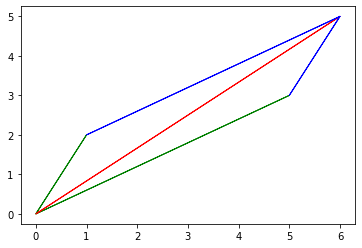

In [89]:
import matplotlib.pyplot as plt
plt.arrow(0,0,A[0],A[1], color = 'g')
plt.arrow(0,0,B[0],B[1], color = 'g')
plt.arrow(0,0,C[0],C[1], color = 'r')
plt.arrow(A[0],A[1],B[0],B[1], color = 'b')
plt.arrow(B[0],B[1],A[0],A[1], color  = 'b')
plt.show()

### Zadanie 4

Wygeneruj losową macierz 8×8 wg rozkładu Gaussa (średnia: 100, odch. std = 15),
wartości zaokrąglij do liczb całkowitych (int). Macierz ta reprezentuje pewien obraz (w skali szarości).

Następnie zastosuj filtr uśredniający o masce 3×3 dla elementów wewnętrznych (tj. poza brzegiem) tej macierzy i wypisz wynik. W filtrze uśredniającym zastosuj zaokrąglanie w dół do liczby całkowitej.

_Podpowiedź: generacja danych: np.random.normal, np.round._

In [92]:
mu, sigma = 100, 15

s = np.random.normal(mu, sigma, 64)
s = s.astype('int32')
s

array([ 92, 110,  85,  93, 100,  88,  93,  87,  67, 102,  73, 120, 106,
       109, 117, 124, 125,  69,  99,  71,  92, 101, 122, 111, 117,  76,
       109,  92,  86,  87, 119, 115,  97,  87,  79,  96,  99, 117, 117,
       106,  93, 102,  94, 105, 100,  97, 129, 101,  75,  77, 109, 105,
        97,  92,  85, 119,  90,  87,  81,  98, 113,  80, 107,  99])